In [39]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

LOADING DATASET

In [40]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')


In [41]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [42]:
print("shape of x_train:  ",X_train.shape)
print("shape of y_train:  ",Y_train.shape)
print("shape of x_test:  ",X_test.shape)
print("shape of y_test:  ",Y_test.shape)

shape of x_train:   (2000, 100, 100, 3)
shape of y_train:   (2000, 1)
shape of x_test:   (400, 100, 100, 3)
shape of y_test:   (400, 1)


In [1]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

NameError: name 'random' is not defined

MODEL

In [50]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),

   Flatten(),
   Dense(64, activation = 'relu'),
   Dense(1, activation = 'sigmoid')
])

In [52]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

In [53]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 8s 215ms/step - loss: 0.8300 - accuracy: 0.5170
Epoch 2/5
32/32 [==============================] - 6s 198ms/step - loss: 0.6801 - accuracy: 0.5765
Epoch 3/5
32/32 [==============================] - 6s 200ms/step - loss: 0.6298 - accuracy: 0.6635
Epoch 4/5
32/32 [==============================] - 6s 199ms/step - loss: 0.5908 - accuracy: 0.6860
Epoch 5/5
32/32 [==============================] - 6s 202ms/step - loss: 0.5504 - accuracy: 0.7250


In [54]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 40ms/step - loss: 0.6354 - accuracy: 0.6375


[0.6354107856750488, 0.637499988079071]

Making Prediction

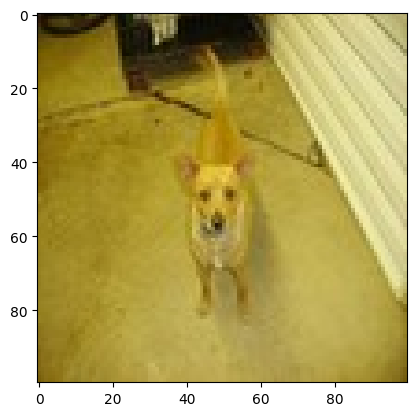

1/1 [==============================] - 0s 33ms/step
Our model says it is a : dog


In [63]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2])
plt.show()

image_for_prediction = X_test[idx2, :].reshape(1, 100, 100, 3)

y_pred = model.predict(image_for_prediction)
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)
